In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv

In [32]:
def step_gradient(points, learning_rate, b_current, m_current):
    m_slope = 0
    b_slope = 0
    N = len(points)
    
    for i in range(N):
        x = points[i,0]
        y = points[i,1]
        b_slope += -(2/N) * (y - m_current*x - b_current)
        m_slope += -(2/N) * (y - m_current*x - b_current) * x
    
    new_m = m_current - learning_rate*m_slope
    new_b = b_current - learning_rate*b_slope
    return (new_b,new_m)

def cost_gd(b, m, points):
    total_cost = 0
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        total_cost += (y-(m*x+b))**2
    return total_cost/len(points)
    
def gd_runner(points, learning_rate, num_iterations):
    b = 0
    m = 0
    
    cost_list = []
    
    for i in range(num_iterations):
        cur_cost = cost_gd(b, m, points)
        
        if (i%10 == 0):
            plt.figure(i/10)
            #plt.plot([100,0],[m*100x+b,b]) #line plot
            
            y_values = []
            for i in range(len(points)):
                x = points[i,0]
                y_values.append(m*x + b)
            
            plt.plot(points[:,0], y_values)
            plt.scatter(points[:,0] , points[:,1])
            
        cost_list.append(cur_cost)
        
        # print(i, " ",cur_cost)
        b,m = step_gradient(points, learning_rate,b ,m)
    
    print("FINAL"," ",cost_gd(b,m,points))
    cost_list.append(cost_gd(b,m,points))
    
    return (b,m,cost_list)

def run():
    points = np.loadtxt(open("data.csv", "rb"), delimiter=",")
    learning_rate = 0.0001
    num_iterations = 100
    
    #number of iterations to be kept less for plotting the graph
    
    # print(points)
    final_b, final_m, cost_list = gd_runner(points, learning_rate, num_iterations)
    
    iterations_list = np.array([i for i in range(num_iterations+1)])
    
    print(final_b,final_m)
    
    #print(cost_list)
    #print(iterations_list)
    
    # number of iterations v/s cost
    # plt.plot(iterations_list,cost_list)
    plt.show()
    
    #print(iterations_list)

FINAL   112.647056643
0.0350749705923 1.47880271753


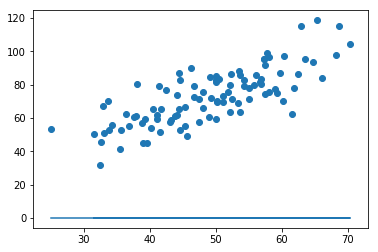

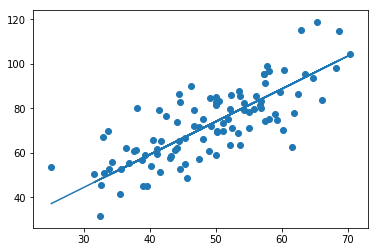

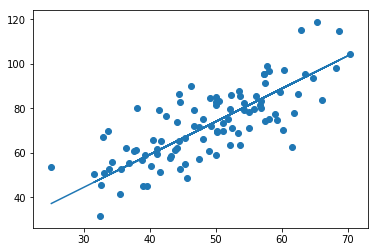

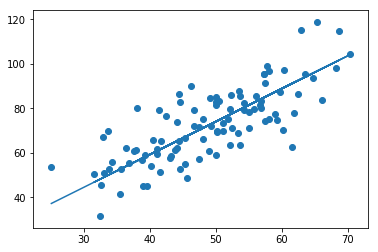

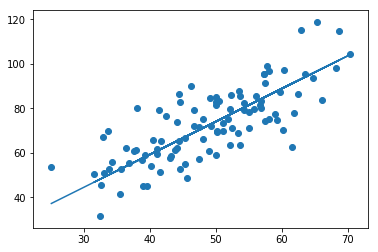

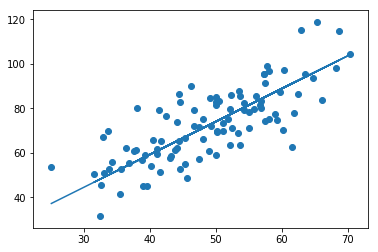

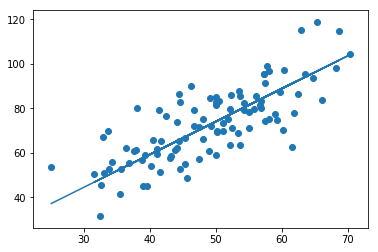

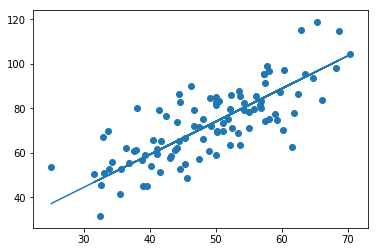

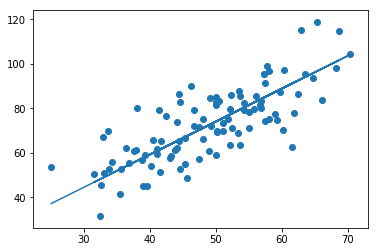

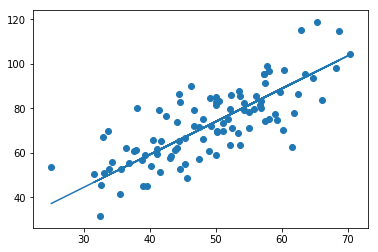

In [33]:
run()

In [43]:
points1 = pd.read_csv("data.csv")
points1.columns = ['X','Y']
#points1
X_train, X_test, Y_train, Y_test = cv.train_test_split(points1 , points1['Y'] , test_size = 0.2)
clf = LinearRegression()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print(Y_predict)
print(Y_test)
print(clf.score(X_test, Y_test))

[  50.39267014   80.16627545   90.12357207   53.45439421   75.3312423
   48.84715332   96.76956643   80.20752314  115.2441528    69.51050331
   93.57611869   95.53668685   62.00892325   66.58814441   66.22495789
   87.23092513   82.47884676   54.0840548    74.08413012   79.05240617]
69     50.392670
49     80.166275
92     90.123572
98     53.454394
7      75.331242
17     48.847153
32     96.769566
79     80.207523
43    115.244153
86     69.510503
48     93.576119
66     95.536687
11     62.008923
34     66.588144
97     66.224958
3      87.230925
10     82.478847
45     54.084055
33     74.084130
27     79.052406
Name: Y, dtype: float64
1.0
